# <div dir=rtl>
<b><p align="justify"><font face = "IRLotus" size = "7">
کران مرتبه اول
</font><br />
</div>

## <div dir=rtl>
<b><p align="justify"><font face = "IRLotus" size = "5">
ترسیم تقریب فازی از تابع اصلی و میزان خطای آن در سوال ۲-۱۱ (تابع تعلق مثلثی)
</font><br />
</div>

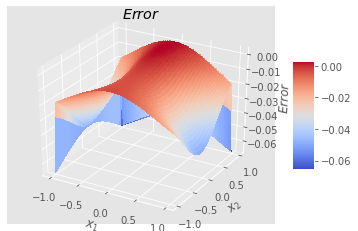

--- 3.772216796875 seconds ---


In [ ]:
import time
start_time = time.time()
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')

alpha = -1
beta = 1
h = 0.05
N = 41

x1 = np.arange(alpha, beta, 0.01)
x2 = np.arange(alpha, beta, 0.01)
x1, x2 = np.meshgrid(x1, x2)

g_bar = np.zeros((N*N, 1))
e_i1 = np.zeros((N, 1))
e_i2 = np.zeros((N, 1))

num = 0
den = 0
k = 0

def trimf(x, abc):
    return np.fmax(np.fmin((x-abc[0])/(abc[1]-abc[0]), (abc[2]-x)/(abc[2]-abc[1])), 0)

for i1 in range(1,N):
    for i2 in range(1,N):
        e_i1[i1-1,0] = -1 + h*(i1-1)
        e_i2[i2-1,0] = -1 + h*(i2-1)
        if i1==1:
            mu_A_x1 = trimf(x1, [-1,-1,-1+h])
        elif i1==N:
            mu_A_x1 = trimf(x1,[1-h, 1, 1])
        else:
            mu_A_x1 = trimf(x1,[-1+h*(i1-2), -1+h*(i1-1), -1+h*(i1)])

        if i2==1:
            mu_A_x2 = trimf(x2, [-1,-1,-1+h])
        elif i2==N:
            mu_A_x2 = trimf(x2,[1-h, 1, 1])
        else:
            mu_A_x2 = trimf(x2,[-1+h*(i2-2), -1+h*(i2-1), -1+h*(i2)])

        g_bar[k,0]= 1/(1+e_i1[i1, 0]**2+e_i2[i2, 0]**2)
        num = num + g_bar[k,0]*mu_A_x1*mu_A_x2
        den=den+mu_A_x1*mu_A_x2
        k=k+1
        
f_x = num/den
g_x = 1/(1+x1**2+x2**2)

fig = plt.figure()
ax = fig.gca(projection='3d')
E = g_x - f_x
surf = ax.plot_surface(x1, x2, E, cmap=cm.coolwarm,
                            linewidth=0, antialiased=False)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$Error$')
ax.set_title('$Error$')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('fuzzy1.svg')
plt.show()

# Print time of execution
print("--- %s seconds ---" % (time.time() - start_time))

## <div dir=rtl>
<b><p align="justify"><font face = "IRLotus" size = "5">
ترسیم تقریب فازی از تابع اصلی و میزان خطای آن در سوال ۲-۱۱ (تابع تعلق گاوسی)
</font><br />
</div>

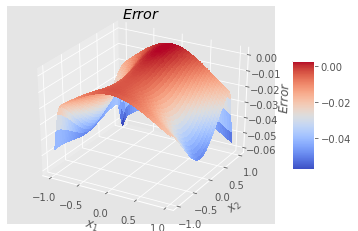

--- 5.531027793884277 seconds ---


In [ ]:
import time
start_time = time.time()
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')

alpha = -1
beta = 1
h = 0.05
N = 41

x1 = np.arange(alpha, beta, 0.01)
x2 = np.arange(alpha, beta, 0.01)
x1, x2 = np.meshgrid(x1, x2)

g_bar = np.zeros((N*N, 1))
e_i1 = np.zeros((N, 1))
e_i2 = np.zeros((N, 1))

num = 0
den = 0
k = 0

def gaussmf(x, abc):
    return np.exp(-((x - abc[1]) / abc[0]) ** 2 / 2)


for i1 in range(1, N):
    for i2 in range(1, N):
        e_i1[i1 - 1, 0] = -1 + h * (i1 - 1)
        e_i2[i2 - 1, 0] = -1 + h * (i2 - 1)
        if i1 == 1:
            mu_A_x1 = gaussmf(x1, [h, -1])
        elif i1 == N:
            mu_A_x1 = gaussmf(x1, [h, 1])
        else:
            mu_A_x1 = gaussmf(x1, [h, -1 + h * (i1 - 1)])

        if i2 == 1:
            mu_A_x2 = gaussmf(x2, [h, -1])
        elif i2 == N:
            mu_A_x2 = gaussmf(x2, [h, 1])
        else:
            mu_A_x2 = gaussmf(x2, [h, -1 + h * (i2 - 1)])

        g_bar[k,0]= 1/(1+e_i1[i1, 0]**2+e_i2[i2, 0]**2)
        num = num + g_bar[k, 0] * mu_A_x1 * mu_A_x2
        den = den + mu_A_x1 * mu_A_x2
        k = k + 1

f_x = num / den
g_x = 1/(1+x1**2+x2**2)

fig = plt.figure()
ax = fig.gca(projection='3d')
E = g_x - f_x
surf = ax.plot_surface(x1, x2, E, cmap=cm.coolwarm,
                            linewidth=0, antialiased=False)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$Error$')
ax.set_title('$Error$')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('fuzzy2.svg')
plt.show()

# Print time of execution
print("--- %s seconds ---" % (time.time() - start_time))

# <div dir=rtl>
<b><p align="justify"><font face = "IRLotus" size = "7">
کران مرتبه دوم
</font><br />
</div>

## <div dir=rtl>
<b><p align="justify"><font face = "IRLotus" size = "5">
ترسیم تقریب فازی از تابع اصلی و میزان خطای آن در سوال ۲-۱۱ (تابع تعلق مثلثی)
</font><br />
</div>

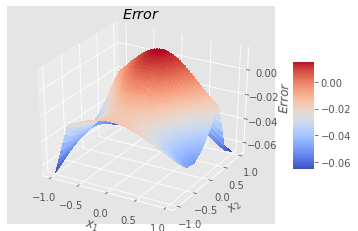

--- 1.4487650394439697 seconds ---


In [ ]:
import time
start_time = time.time()
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')

alpha = -1
beta = 1
h = 0.25
N = 9

x1 = np.arange(alpha, beta, 0.01)
x2 = np.arange(alpha, beta, 0.01)
x1, x2 = np.meshgrid(x1, x2)

g_bar = np.zeros((N*N, 1))
e_i1 = np.zeros((N, 1))
e_i2 = np.zeros((N, 1))

num = 0
den = 0
k = 0

def trimf(x, abc):
    return np.fmax(np.fmin((x-abc[0])/(abc[1]-abc[0]), (abc[2]-x)/(abc[2]-abc[1])), 0)

for i1 in range(1,N):
    for i2 in range(1,N):
        e_i1[i1-1,0] = -1 + h*(i1-1)
        e_i2[i2-1,0] = -1 + h*(i2-1)
        if i1==1:
            mu_A_x1 = trimf(x1, [-1,-1,-1+h])
        elif i1==N:
            mu_A_x1 = trimf(x1,[1-h, 1, 1])
        else:
            mu_A_x1 = trimf(x1,[-1+h*(i1-2), -1+h*(i1-1), -1+h*(i1)])

        if i2==1:
            mu_A_x2 = trimf(x2, [-1,-1,-1+h])
        elif i2==N:
            mu_A_x2 = trimf(x2,[1-h, 1, 1])
        else:
            mu_A_x2 = trimf(x2,[-1+h*(i2-2), -1+h*(i2-1), -1+h*(i2)])

        g_bar[k,0]= 1/(1+e_i1[i1, 0]**2+e_i2[i2, 0]**2)
        num = num + g_bar[k,0]*mu_A_x1*mu_A_x2
        den=den+mu_A_x1*mu_A_x2
        k=k+1
        
f_x = num/den
g_x = 1/(1+x1**2+x2**2)

fig = plt.figure()
ax = fig.gca(projection='3d')
E = g_x - f_x
surf = ax.plot_surface(x1, x2, E, cmap=cm.coolwarm,
                            linewidth=0, antialiased=False)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$Error$')
ax.set_title('$Error$')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('fuzzy3.svg')
plt.show()

# Print time of execution
print("--- %s seconds ---" % (time.time() - start_time))

## <div dir=rtl>
<b><p align="justify"><font face = "IRLotus" size = "5">
ترسیم تقریب فازی از تابع اصلی و میزان خطای آن در سوال ۲-۱۱ (تابع تعلق گاوسی)
</font><br />
</div>

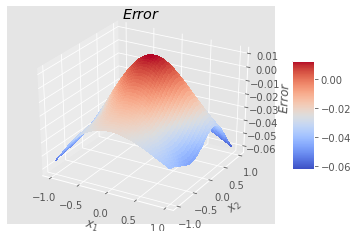

--- 1.9724161624908447 seconds ---


In [ ]:
import time
start_time = time.time()
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')

alpha = -1
beta = 1
h = 0.25
N = 9

x1 = np.arange(alpha, beta, 0.01)
x2 = np.arange(alpha, beta, 0.01)
x1, x2 = np.meshgrid(x1, x2)

g_bar = np.zeros((N*N, 1))
e_i1 = np.zeros((N, 1))
e_i2 = np.zeros((N, 1))

num = 0
den = 0
k = 0

def gaussmf(x, abc):
    return np.exp(-((x - abc[1]) / abc[0]) ** 2 / 2)


for i1 in range(1, N):
    for i2 in range(1, N):
        e_i1[i1 - 1, 0] = -1 + h * (i1 - 1)
        e_i2[i2 - 1, 0] = -1 + h * (i2 - 1)
        if i1 == 1:
            mu_A_x1 = gaussmf(x1, [h, -1])
        elif i1 == N:
            mu_A_x1 = gaussmf(x1, [h, 1])
        else:
            mu_A_x1 = gaussmf(x1, [h, -1 + h * (i1 - 1)])

        if i2 == 1:
            mu_A_x2 = gaussmf(x2, [h, -1])
        elif i2 == N:
            mu_A_x2 = gaussmf(x2, [h, 1])
        else:
            mu_A_x2 = gaussmf(x2, [h, -1 + h * (i2 - 1)])

        g_bar[k,0]= 1/(1+e_i1[i1, 0]**2+e_i2[i2, 0]**2)
        num = num + g_bar[k, 0] * mu_A_x1 * mu_A_x2
        den = den + mu_A_x1 * mu_A_x2
        k = k + 1

f_x = num / den
g_x = 1/(1+x1**2+x2**2)

fig = plt.figure()
ax = fig.gca(projection='3d')
E = g_x - f_x
surf = ax.plot_surface(x1, x2, E, cmap=cm.coolwarm,
                            linewidth=0, antialiased=False)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$Error$')
ax.set_title('$Error$')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('fuzzy4.svg')
plt.show()

# Print time of execution
print("--- %s seconds ---" % (time.time() - start_time))